In [16]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 32)
#%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette("Blues")


In [17]:
#Reading in data for each of the last 5 years
data20 = pd.read_csv('nba20.csv')
data19 = pd.read_csv('nba19.csv')
data18 = pd.read_csv('nba18.csv')
data17 = pd.read_csv('nba17.csv')
data16 = pd.read_csv('nba16.csv')

#adding Year column for each
data20['Year'] = 2020
data19['Year'] = 2019
data18['Year'] = 2018
data17['Year'] = 2017
data16['Year'] = 2016

#combining datasets into one
data = pd.concat([data20,data19,data18,data17,data16])


data.columns = map(str.lower, data.columns)


#data[(data['gp']>30) & (data['mins']>20)].sort_values('+/-', ascending = False).iloc[0:15]
data['ts']=data['pts']/(2*(data['fga'] + (.44 * data['fta'])))


In [18]:
salary = pd.read_csv('nba_salary20.csv').iloc[:,[1,3]]

salary['Player']=[i.split('\\')[0] for i in salary['Player']]
salary.columns = ['Player','Salary']
salary['Salary'] = [int(i.strip('$')) for i in salary['Salary']]

data20_w_salary = pd.merge(data20,salary, on='Player',how='left')


# MVP

In [19]:
#dataframe of the last 4 MVPs

mvp19 = data19[data19['Player']=='Giannis Antetokounmpo']
mvp18 =data18[data18['Player']=='James Harden']
mvp17= data17[data17['Player']=='Russell Westbrook']
mvp16 = data16[data16['Player']=='Stephen Curry']

mvps = pd.concat([mvp19,mvp18,mvp17,mvp16])

mvps


,Player,Team,Age,GP,W,L,Mins,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,Year
2,Giannis Antetokounmpo,MIL,24,72,56,16,32.8,27.7,10.0,17.3,57.8,0.7,2.8,25.6,6.9,9.5,72.9,2.2,10.3,12.5,5.9,3.7,1.3,1.5,3.2,56.2,54,5,9.1,2019
0,James Harden,HOU,28,72,59,13,35.4,30.4,9.0,20.1,44.9,3.7,10.0,36.7,8.7,10.1,85.8,0.6,4.8,5.4,8.8,4.4,1.8,0.7,2.3,53.0,31,4,7.3,2018
0,Russell Westbrook,OKC,28,81,46,35,34.6,31.6,10.2,24.0,42.5,2.5,7.2,34.3,8.8,10.4,84.5,1.7,9.0,10.7,10.4,5.4,1.6,0.4,2.3,60.6,62,42,3.1,2017
0,Stephen Curry,GSW,28,79,71,8,34.2,30.1,10.2,20.2,50.4,5.1,11.2,45.4,4.6,5.1,90.8,0.9,4.6,5.4,6.7,3.3,2.1,0.2,2.0,50.3,15,2,12.9,2016


Text(0.5, 1.0, 'Scoring and Plus/Minus for Previous MVPs')

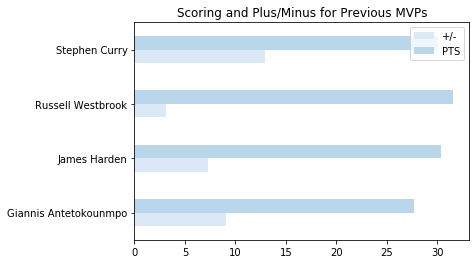

In [59]:
#points and Plus/Minus are two of the main focusses when choosing MVP
mvps.set_index('Player')[['+/-','PTS']].plot(kind='barh')
#mvps['+/-'].plot(kind='barh')
plt.xlabel('')
plt.ylabel('')
plt.title('Scoring and Plus/Minus for Previous MVPs')


In [21]:
#addtionally, the entire team performance is also a determining factor
mvps['Win Percentage'] = mvps['W']/(mvps['W'] + mvps['L'])
mvps['Win Percentage'].mean()

0.7659644085013283

Text(0, 0.5, '')

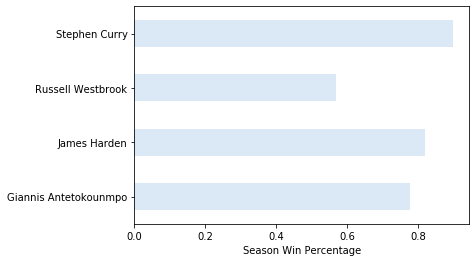

In [55]:
mvps.set_index("Player")['Win Percentage'].plot(kind='barh', ylim=(0,1))
plt.xlabel('Season Win Percentage')
plt.ylabel('')

In [23]:
#each of the last 4 MVPs have been in the top 10 in Plus/Minus

#data16.sort_values('+/-', ascending = False)[:10]

In [24]:
#This season, Giannis has been on a different level
select20 = ['Player','Team','GP','W','L','Mins','PTS','FG%','3P%','FTA','REB','AST','STL','BLK','DD2','TD3','+/-']
twenty20_filter = data20[(data20['GP']>30) & (data20['PTS']>20)].sort_values('+/-', ascending = False)[select20]

twenty20_mvps = twenty20_filter.loc[twenty20_filter['Player'].isin(
    ['Giannis Antetokounmpo','LeBron James','James Harden','Luka Doncic','Kawhi Leonard'])]

twenty20_mvps 

,Player,Team,GP,W,L,Mins,PTS,FG%,3P%,FTA,REB,AST,STL,BLK,DD2,TD3,+/-
2,Giannis Antetokounmpo,MIL,57,48,9,30.9,29.6,54.7,30.6,10.0,13.7,5.8,1.0,1.0,52,4,11.4
12,LeBron James,LAL,60,47,13,34.9,25.7,49.8,34.9,5.7,7.9,10.6,1.2,0.5,42,13,8.1
8,Kawhi Leonard,LAC,51,38,13,32.2,26.9,46.9,36.6,6.9,7.3,5.0,1.8,0.6,13,1,7.8
5,Luka Doncic,DAL,54,34,20,33.3,28.7,46.1,31.8,9.1,9.3,8.7,1.1,0.2,34,14,4.8
0,James Harden,HOU,61,39,22,36.7,34.4,43.5,35.2,11.8,6.4,7.4,1.7,0.9,19,4,4.1


Text(0, 0.5, '')

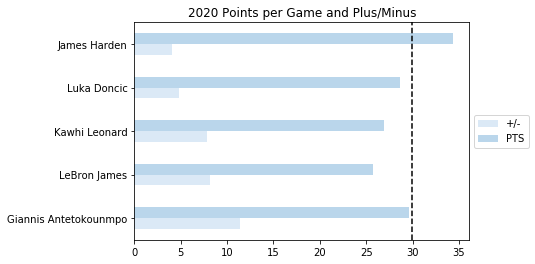

In [66]:
#comparing this years MVP candidates with previous MVP scoring average
twenty20_mvps.set_index('Player')[['+/-','PTS']].plot(kind='barh')
plt.title('2020 Points per Game and Plus/Minus')
plt.axvline(29.9, color="k", linestyle="--")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, '')

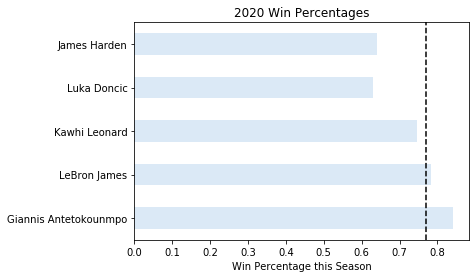

In [67]:
#comparing this years MVP candidates with previous MVP win percentage
twenty20_mvps['Win Percentage'] = twenty20_mvps['W']/(twenty20_mvps['W'] + twenty20_mvps['L'])
twenty20_mvps.set_index('Player')[['Win Percentage']].plot(kind='barh',legend=False)
plt.xlabel('Win Percentage this Season')
plt.title('2020 Win Percentages')
plt.axvline(.77, color="k", linestyle="--")
plt.ylabel('')

Text(0, 0.5, '')

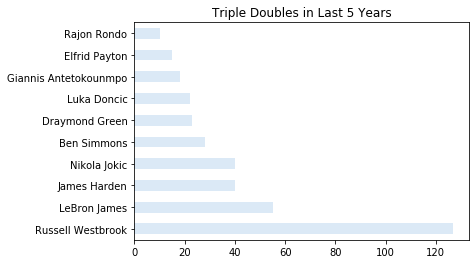

In [27]:
#If you are wonder how Westbrook won an MVP, he is a Tripple Double machine

select = ['Player','Team','GP','W','L','Mins','PTS','FG%','3P%','FTA','REB','AST','STL','BLK','DD2','TD3','+/-']

total_td3 = data.groupby('player').sum()[['td3']]
top10_td3 = total_td3.sort_values('td3', ascending=False)[:10]
top10_td3.plot(kind='barh',legend=False)
plt.title('Triple Doubles in Last 5 Years')
plt.ylabel('')

# Rookie of the Year

In [28]:
#Potential ROY for 2020:

rookies20 = data20[data20['Player'].isin(
    ['Coby White','Zion Williamson', 'Ja Morant','Brandon Clarke','Kendrick Nunn',"De'Andre Hunter"])]


#Previous ROYs
roy19 = data19[data19['Player']=='Luka Doncic']
roy18 = data18[data18['Player']=='Ben Simmons']
roy17 = data17[data17['Player']=='Malcolm Brogdon']
roy16 = data16[data16['Player']=='Karl-Anthony Towns']

roys = pd.concat([roy19,roy18,roy17,roy16])


Text(0.5, 1.0, 'Scoring and Plus/Minus for Previous ROYs')

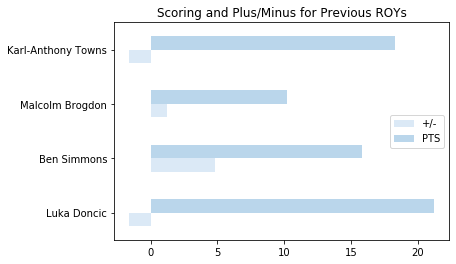

In [72]:
#ROY has taken individual ability into account more than team contribution over the last 5 years
roys.set_index('Player')[['+/-','PTS']].plot(kind='barh')
#plt.axvline(16.375, color="k", linestyle="--")
plt.ylabel('')
plt.title('Scoring and Plus/Minus for Previous ROYs')

Text(0, 0.5, '')

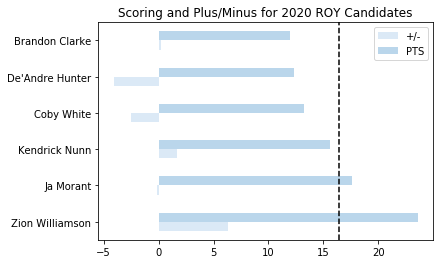

In [71]:
#Ja Morant and Zion Williamson have the clear advantage in the scoring category
#sns.catplot(x='PTS', y="Player", data=rookies20,
                #height=6, kind="bar", palette = 'Blues')
rookies20.set_index('Player')[['+/-','PTS']].plot(kind='barh')
plt.axvline(16.375, color="k", linestyle="--", label='avg')
plt.title('Scoring and Plus/Minus for 2020 ROY Candidates')
plt.ylabel('')

In [46]:
rookies20['TS']=rookies20['PTS']/(2*(rookies20['FGA'] + (.44 * rookies20['FTA'])))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


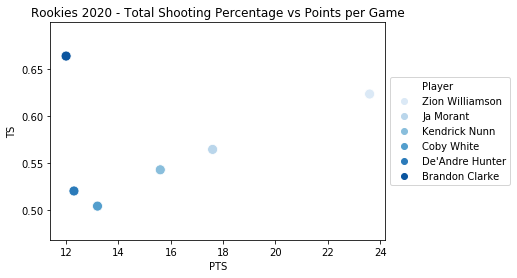

In [63]:
#At this rate...Zion Williamson should win Rookie of the Year - He has the highest Scoring + Efficiency
sns.scatterplot(x='PTS', y='TS', hue = 'Player', data=rookies20, s =100, palette = sns.color_palette("Blues"))
plt.title('Rookies 2020 - Total Shooting Percentage vs Points per Game')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# NBA Champion


Text(0.5, 1.0, 'Average Plus/Minus Per Team')

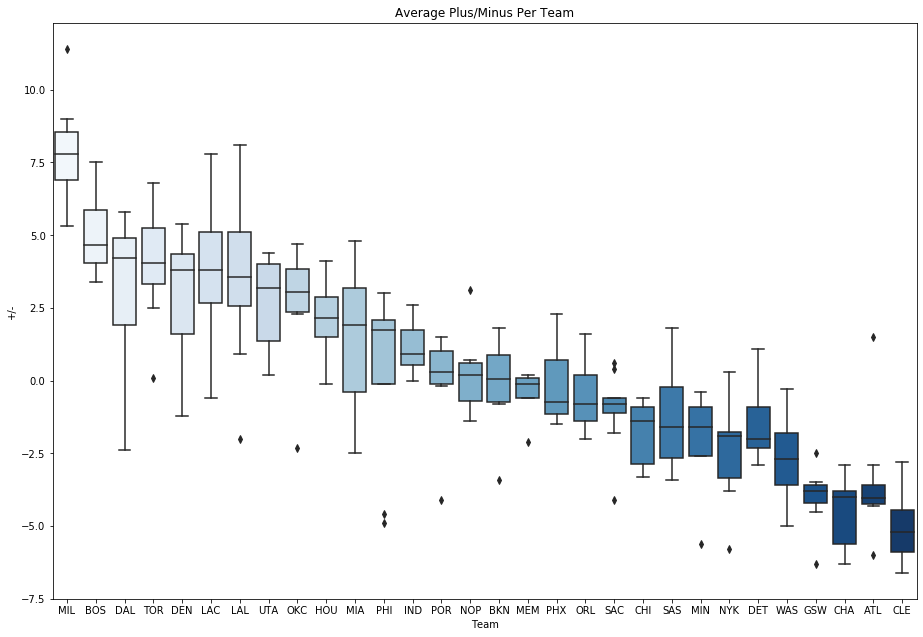

In [31]:
#filtering for relavent players
relavent20 = data20[(data20['GP']>30) & (data20['Mins']>20)]

#Box plot based on Plus/Minus rating 
plt.axes([2, 2, 2, 2])
order = relavent20.groupby('Team').median()['+/-'].sort_values(ascending=False).index
sns.boxplot(x='Team', y='+/-', data=relavent20, order=order, palette = sns.color_palette("Blues", n_colors=30))
plt.title('Average Plus/Minus Per Team')

Text(0, 0.5, 'Number of Players')

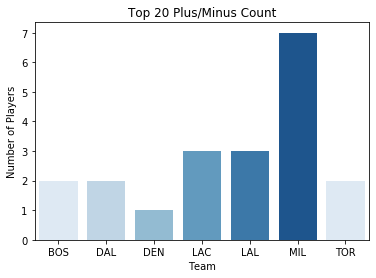

In [32]:
#filtering for top 20 best players in Plus/Minus
relavent_top_pm = relavent20.sort_values('+/-', ascending=False)[:20]

pm_count = relavent_top_pm.groupby('Team').count()[['+/-']] #group by team and get count
pm_count = pm_count.reset_index()

order = pm_count.sort_values('+/-', ascending=False).index
#pm_count.sort_values('+/-', ascending=False).index


#barplot showing how many of the top 20 players based on Plus/Minus that each team has
sns.barplot(x='Team',y='+/-',data = pm_count, palette = sns.color_palette("Blues"))
plt.title('Top 20 Plus/Minus Count')
plt.ylabel('Number of Players')

# Rising Stars

In [33]:
data20_ts = data20['PTS']/(2*(data20['FGA'] + (.44 * data20['FTA'])))
data20_ts

0      0.616664
1      0.577214
2      0.606557
3      0.594569
4      0.619003
         ...   
509    0.000000
510    0.000000
511    0.000000
512    0.000000
513    0.000000
Length: 514, dtype: float64

In [34]:
#average Plus/Minus for relavent players is +.3, lets see how rising stars compare
rising = data20[(data20['Age']<24) & (data20['+/-']>.3) & (data20['Mins']<29)& (data20['Mins']>15)&(data20['GP']>10)].sort_values('+/-',ascending=False)
rising.groupby('Team').count()['Player']
rising

,Player,Team,Age,GP,W,L,Mins,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,Year
190,Donte DiVincenzo,MIL,23,59,51,8,23.1,9.4,3.5,7.7,46.2,1.3,3.7,34.4,1.0,1.3,76.9,1.0,3.9,4.9,2.3,1.2,1.4,0.3,1.6,22.5,1,0,6.9,2020
231,Terence Davis,TOR,22,64,46,18,17.0,7.7,2.8,6.1,46.3,1.4,3.5,39.6,0.7,0.8,86.5,0.7,2.7,3.4,1.7,1.0,0.5,0.2,1.6,15.4,1,0,3.5,2020
220,Jalen Brunson,DAL,23,57,34,23,17.9,8.2,3.2,6.8,46.6,0.8,2.1,35.8,1.1,1.3,81.3,0.4,2.0,2.4,3.3,1.2,0.4,0.1,1.3,16.2,2,0,3.0,2020
227,Ivica Zubac,LAC,23,64,44,20,18.1,8.0,3.2,5.3,60.1,0.0,0.0,0.0,1.7,2.2,75.9,2.6,4.6,7.2,1.1,0.8,0.2,0.9,2.3,20.8,7,0,2.8,2020
183,Landry Shamet,LAC,23,47,31,16,27.5,9.7,3.1,7.5,41.6,2.2,5.7,39.2,1.2,1.3,90.5,0.1,1.8,1.9,1.9,0.8,0.4,0.2,2.8,15.8,0,0,2.7,2020
223,De'Anthony Melton,MEM,21,52,25,27,19.4,8.1,2.8,6.8,41.9,0.7,2.3,31.6,1.7,2.0,82.1,0.7,3.0,3.7,3.0,1.5,1.3,0.3,1.8,20.3,0,0,2.4,2020
394,Grant Williams,BOS,21,62,43,19,15.6,3.5,1.3,3.1,41.7,0.3,1.4,24.7,0.6,0.8,72.5,0.9,1.7,2.7,1.0,0.7,0.5,0.5,2.4,10.4,0,0,2.4,2020
284,Luguentz Dort,OKC,21,29,22,7,22.0,6.2,2.2,5.4,41.4,0.8,2.5,30.1,1.0,1.2,77.8,0.5,1.3,1.9,0.7,0.5,0.8,0.1,2.7,11.6,0,0,1.7,2020
157,Josh Jackson,MEM,23,18,9,9,19.8,10.4,3.8,8.6,43.9,1.3,4.0,31.9,1.6,2.4,65.9,0.6,2.6,3.2,1.7,1.4,1.0,0.5,2.2,20.0,0,0,1.6,2020
188,Aaron Holiday,IND,23,58,36,22,23.6,9.4,3.5,8.6,40.7,1.4,3.5,39.4,1.1,1.2,86.1,0.4,1.9,2.3,3.3,1.3,0.8,0.2,1.8,18.8,2,0,1.5,2020


Text(0, 0.5, 'Plus/Minus')

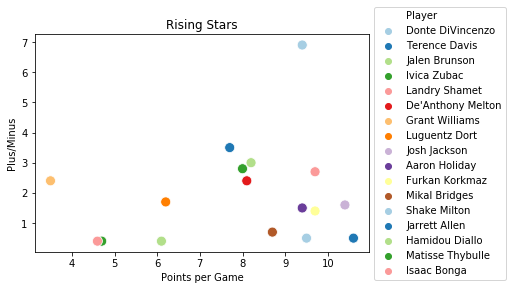

In [51]:
#scatter plot comparing the rising stars 
sns.scatterplot(x='PTS', y='+/-', hue = 'Player', data=rising, s =100, palette = sns.color_palette("Paired", n_colors=17))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Rising Stars')
plt.xlabel('Points per Game')
plt.ylabel('Plus/Minus')

Text(0.5, 1.0, 'Median Age by Team')

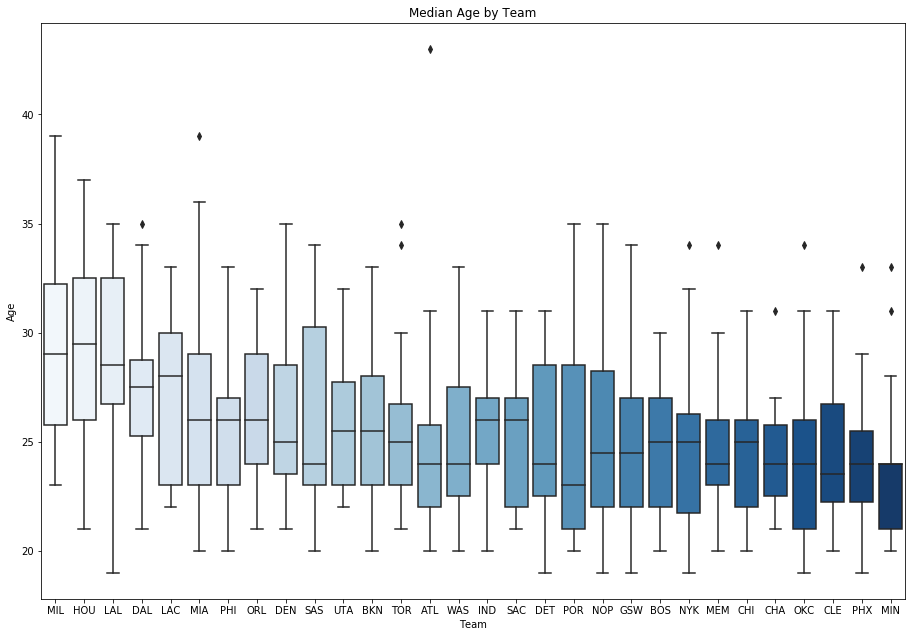

In [50]:
#Ages Boxplot of NBA teams

plt.axes([2, 2, 2, 2])

order = data20.groupby('Team').mean()['Age'].sort_values(ascending=False).index
sns.boxplot(x='Team', y='Age', data=data20,order=order, palette = sns.color_palette("Blues", n_colors=30))
plt.title('Median Age by Team')
#plt.figure(figsize=(30,6))



# Undervalued Players


In [36]:
data20_w_salary
data20_w_salary['TS']=data20_w_salary['PTS']/(2*(data20_w_salary['FGA'] + (.44 * data20_w_salary['FTA'])))

In [37]:
data20_w_salary['Salary'].dropna().count()

430

In [38]:

data20_w_salary

,Player,Team,Age,GP,W,L,Mins,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,Year,Salary,TS
0,James Harden,HOU,30,61,39,22,36.7,34.4,9.9,22.7,43.5,4.4,12.6,35.2,10.1,11.8,86.1,1.0,5.3,6.4,7.4,4.5,1.7,0.9,3.4,56.4,19,4,4.1,2020,37800000.0,0.616664
1,Bradley Beal,WAS,26,57,20,37,36.0,30.5,10.4,22.9,45.5,3.0,8.4,35.3,6.8,8.0,84.2,0.9,3.3,4.2,6.1,3.4,1.2,0.4,2.2,46.3,8,0,-3.5,2020,27093019.0,0.577214
2,Giannis Antetokounmpo,MIL,25,57,48,9,30.9,29.6,10.9,20.0,54.7,1.5,4.8,30.6,6.3,10.0,63.3,2.3,11.5,13.7,5.8,3.7,1.0,1.0,3.0,57.3,52,4,11.4,2020,25842697.0,0.606557
3,Trae Young,ATL,21,60,18,42,35.3,29.6,9.1,20.8,43.7,3.4,9.5,36.1,8.0,9.3,86.0,0.5,3.7,4.3,9.3,4.8,1.1,0.1,1.7,47.6,28,2,-3.8,2020,6273000.0,0.594569
4,Damian Lillard,POR,29,58,27,31,36.9,28.9,9.2,20.0,45.7,3.9,9.9,39.4,6.7,7.6,88.8,0.5,3.8,4.3,7.8,2.9,1.0,0.4,1.7,47.0,16,1,1.2,2020,29802321.0,0.619003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,Quinndary Weatherspoon,SAS,23,3,0,3,5.0,0.0,0.0,1.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.3,0.3,0.0,0.0,0.0,0.0,0.9,0,0,1.3,2020,NaN,0.000000
535,Stanton Kidd,UTA,28,4,3,1,3.8,0.0,0.0,0.8,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.8,0.8,0.3,0.5,0.0,0.0,0.8,0.8,0,0,-0.3,2020,250000.0,0.000000
536,Talen Horton-Tucker,LAL,19,2,1,1,2.7,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,3.0,0,0,-3.5,2020,898310.0,0.000000
537,Vic Law,ORL,24,5,1,4,1.9,0.0,0.0,0.6,0.0,0.0,0.2,0.0,0.0,0.4,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0,0,-0.4,2020,NaN,0.000000


Text(0.5, 1.0, 'NBA Salary Distribution')

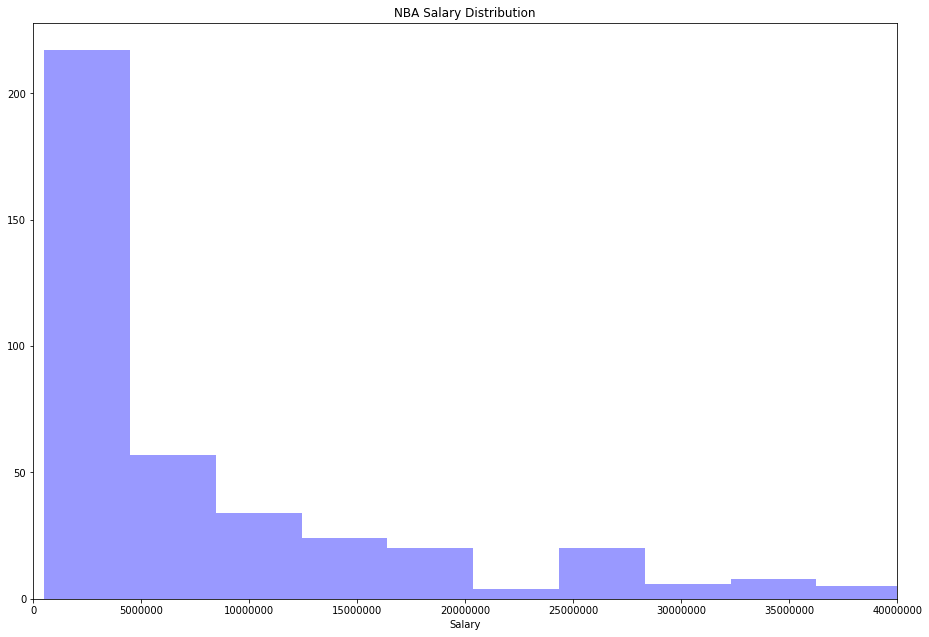

In [39]:
plt.axes([2, 2, 2, 2])
sns.distplot(data20_w_salary[data20_w_salary['Salary']> 500000]['Salary'], kde=False, bins=10, 
             color='b', norm_hist=False)
plt.xlim(0,40000000)
plt.ticklabel_format(style='plain', axis='x')
plt.title('NBA Salary Distribution')

Text(27.125, 0.5, 'Points per Game')

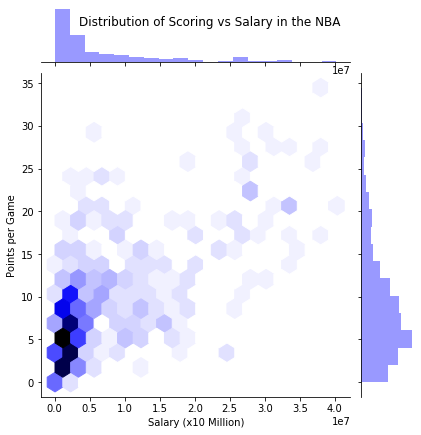

In [52]:
#Joinplot of Points per Game vs Salary
g = sns.jointplot(data = data20_w_salary, x='Salary', y='PTS', kind="hex", color="b")
#plt.ticklabel_format(style='plain', axis='x')
#a.ax_joint.set_xticks(['0', '5', '10','15','20','25','30','35','40'])
#a.set(xlim=(0,40), xticks=[0, 5,10,15,20,25,30,35,40])
plt.subplots_adjust(top=1)
plt.suptitle('Distribution of Scoring vs Salary in the NBA')
g.ax_joint.set_xlabel('Salary (x10 Million)')
g.ax_joint.set_ylabel('Points per Game')

Text(27.125, 0.5, 'Total Shooting Percentage')

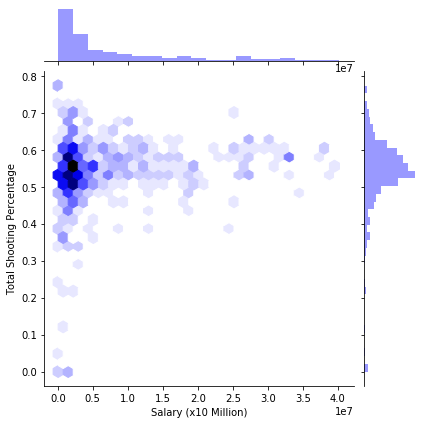

In [41]:
#Joinplot of Total Shooting Percentage vs Salary
a = sns.jointplot(data = data20_w_salary, x='Salary', y='TS', kind="hex", color="b")
a.ax_joint.set_xlabel('Salary (x10 Million)')
a.ax_joint.set_ylabel('Total Shooting Percentage')

Text(27.125, 0.5, 'Total Shooting Percentage')

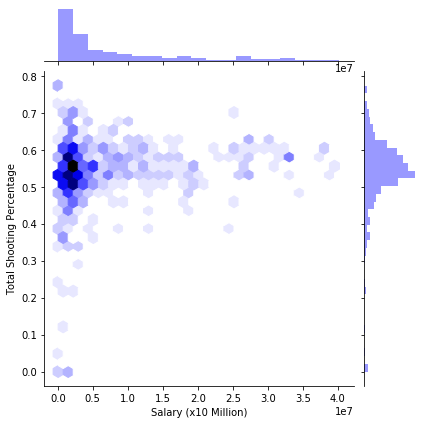

In [42]:
b = sns.jointplot(data = data20_w_salary, x='Salary', y='TS', kind="hex", color="b")
b.ax_joint.set_xlabel('Salary (x10 Million)')
b.ax_joint.set_ylabel('Total Shooting Percentage')

In [43]:
#Filtering for undervalued scorers

undervalued=data20_w_salary[(data20_w_salary['Salary']<5000000) & (data20_w_salary['PTS']>15)]

Text(0, 0.5, 'Points per Game')

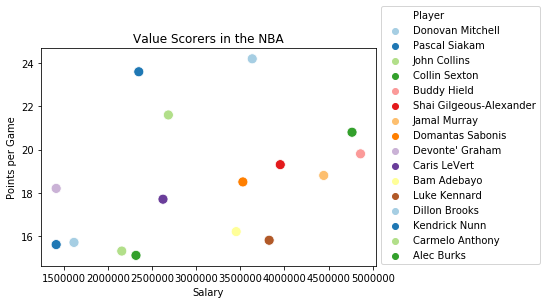

In [44]:
sns.scatterplot(x='Salary', y='PTS', hue = 'Player', data=undervalued, s =100, palette = sns.color_palette("Paired", n_colors=16))
plt.legend(loc='center left', bbox_to_anchor=(1, .6))
plt.title('Value Scorers in the NBA')
plt.ylabel('Points per Game')